In [17]:
# import libs
import pandas as pd


In [18]:
# read csv
df = pd.read_csv("instacart_like_dataset_5k_str_dates.csv")


In [19]:
# check start rows
df.head()


,date,product_id,category,orders,price,discount,campaign_flag,views,clicks,is_holiday
0,01/01/2021,PR003,produce,102,3.67,0.35,1,1235,197,1
1,01/01/2021,PR023,household,20,29.27,0.00,0,209,82,1
2,02/01/2021,PR001,international,14,6.76,0.10,0,238,24,1
3,02/01/2021,PR004,breakfast,25,1.62,0.00,0,195,72,1
4,02/01/2021,PR021,snacks,43,3.66,0.05,0,443,62,1


In [20]:
# rows & cols
df.shape


(5000, 10)

In [23]:
# col names
df.columns


Index(['date', 'product_id', 'category', 'orders', 'price', 'discount',
       'campaign_flag', 'views', 'clicks', 'is_holiday'],
      dtype='object')

In [24]:
# to datetime (dd/mm/yyyy format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# make year, month, day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [25]:
# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns


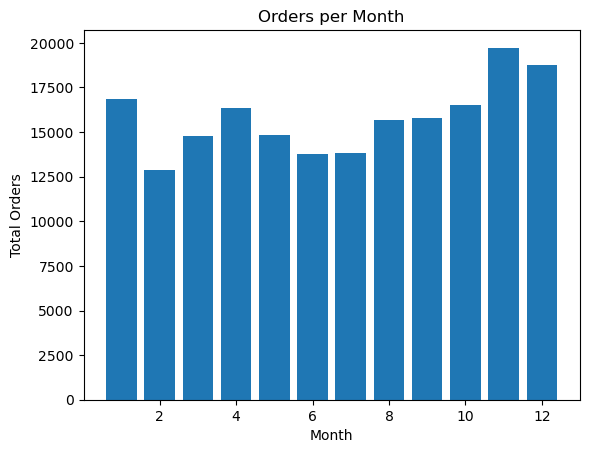

In [26]:
# total orders by month
orders_month = df.groupby('month')['orders'].sum()

# bar plot
plt.bar(orders_month.index, orders_month.values)
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Orders per Month')
plt.show()


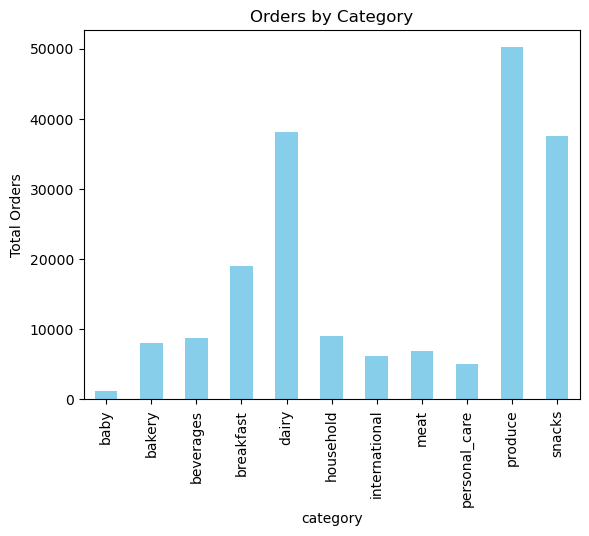

In [27]:
# total sales per category
sales_cat = df.groupby('category')['orders'].sum()

# bar plot
sales_cat.plot(kind='bar', color='skyblue')
plt.ylabel('Total Orders')
plt.title('Orders by Category')
plt.show()


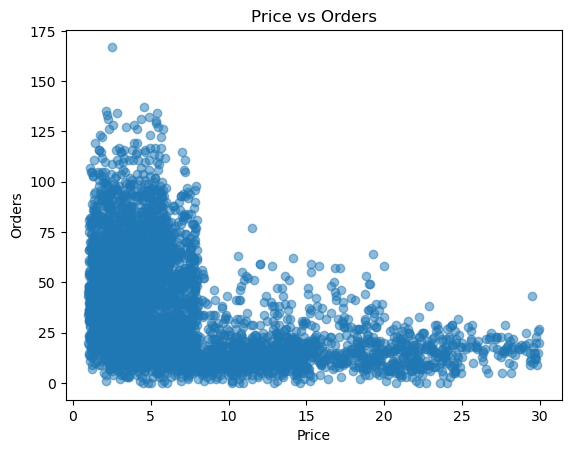

In [28]:
# scatter plot
plt.scatter(df['price'], df['orders'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Orders')
plt.title('Price vs Orders')
plt.show()


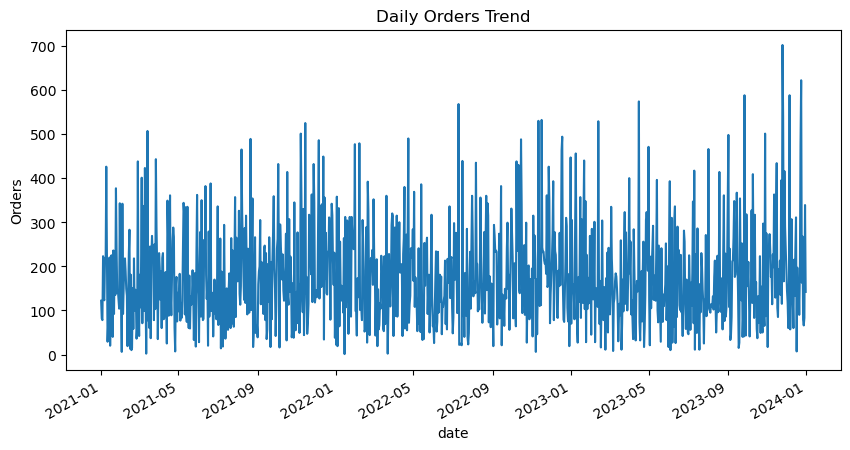

In [29]:
# sum orders by date
daily_orders = df.groupby('date')['orders'].sum()

# line plot
daily_orders.plot(kind='line', figsize=(10,5))
plt.ylabel('Orders')
plt.title('Daily Orders Trend')
plt.show()


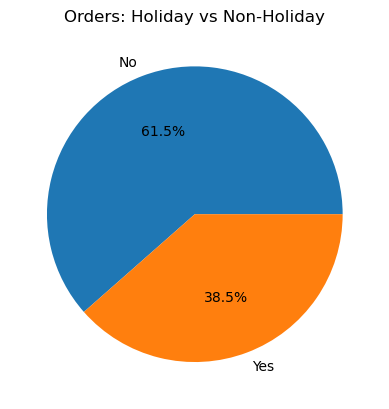

In [30]:
# group by holiday flag
holiday_orders = df.groupby('is_holiday')['orders'].sum()

# pie chart
holiday_orders.plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Orders: Holiday vs Non-Holiday')
plt.ylabel('')
plt.show()


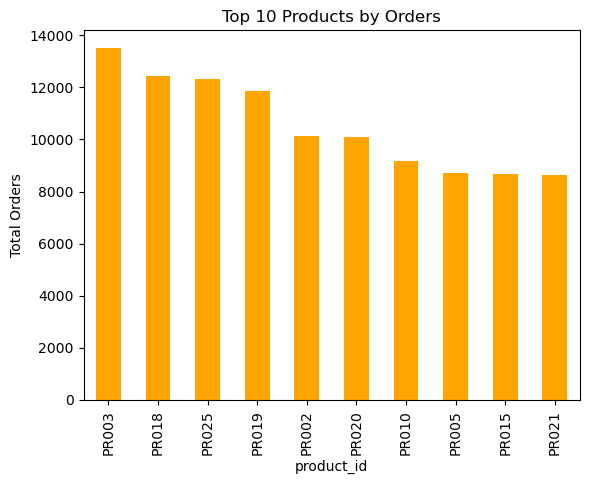

In [31]:
# top products by orders
top_products = df.groupby('product_id')['orders'].sum().sort_values(ascending=False).head(10)

# bar plot
top_products.plot(kind='bar', color='orange')
plt.ylabel('Total Orders')
plt.title('Top 10 Products by Orders')
plt.show()


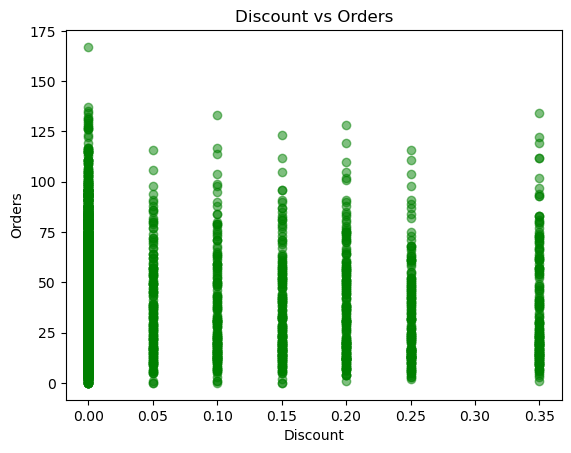

Correlation between Discount and Orders: -0.02332702000385876


In [32]:
# scatter: discount vs orders
plt.scatter(df['discount'], df['orders'], alpha=0.5, color='green')
plt.xlabel('Discount')
plt.ylabel('Orders')
plt.title('Discount vs Orders')
plt.show()

# correlation check
corr_discount_orders = df['discount'].corr(df['orders'])
print("Correlation between Discount and Orders:", corr_discount_orders)


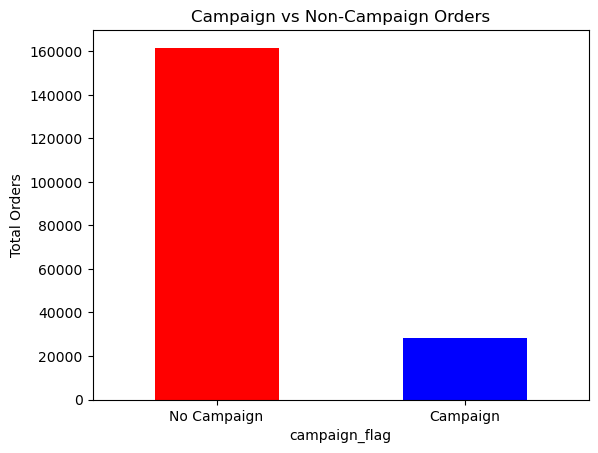

In [33]:
# group by campaign flag
campaign_perf = df.groupby('campaign_flag')['orders'].sum()

# bar plot
campaign_perf.plot(kind='bar', color=['red','blue'])
plt.xticks([0,1], ['No Campaign','Campaign'], rotation=0)
plt.ylabel('Total Orders')
plt.title('Campaign vs Non-Campaign Orders')
plt.show()


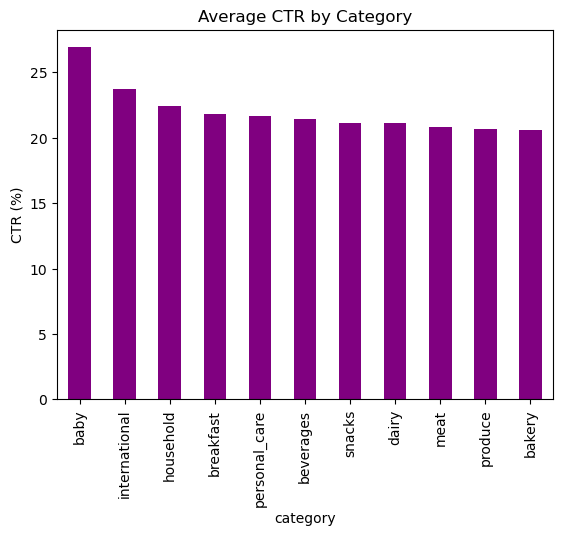

In [34]:
# add conversion rate column
df['ctr'] = (df['clicks'] / df['views']) * 100

# average CTR by category
ctr_by_category = df.groupby('category')['ctr'].mean().sort_values(ascending=False)

# bar plot
ctr_by_category.plot(kind='bar', color='purple')
plt.ylabel('CTR (%)')
plt.title('Average CTR by Category')
plt.show()


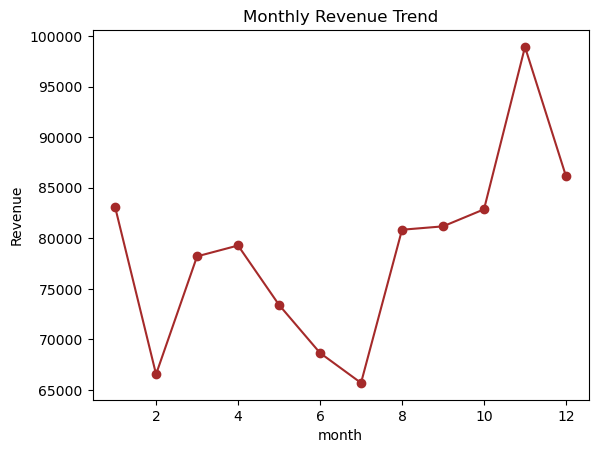

In [35]:
# create revenue column
df['revenue'] = df['orders'] * df['price'] * (1 - df['discount'])

# group by month
monthly_revenue = df.groupby('month')['revenue'].sum()

# line plot
monthly_revenue.plot(marker='o', color='brown')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.show()


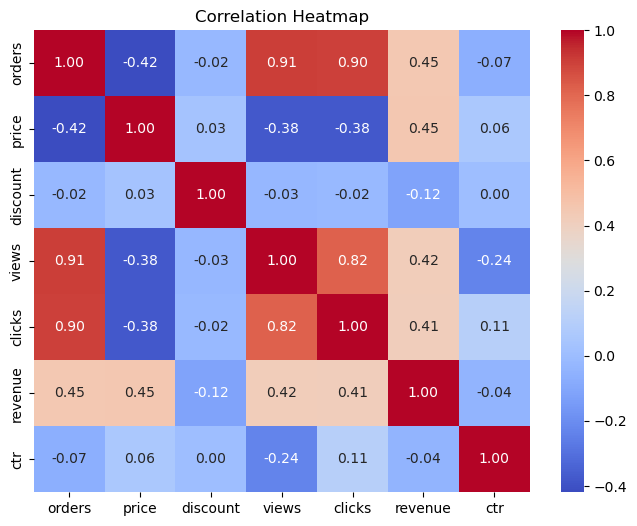

In [36]:
import seaborn as sns

# select numeric columns
numeric_cols = ['orders', 'price', 'discount', 'views', 'clicks', 'revenue', 'ctr']

# correlation matrix
corr = df[numeric_cols].corr()

# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


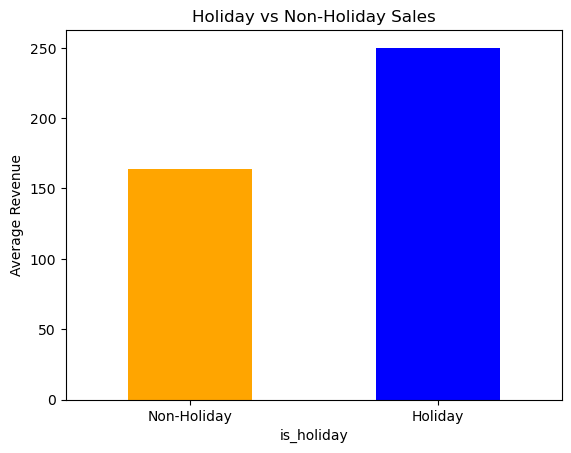

In [37]:
# avg revenue for holiday vs non-holiday
holiday_sales = df.groupby('is_holiday')['revenue'].mean()

# bar plot
holiday_sales.plot(kind='bar', color=['orange', 'blue'])
plt.ylabel('Average Revenue')
plt.title('Holiday vs Non-Holiday Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


In [38]:
# final summary stats by category
summary = df.groupby('category').agg(
    total_orders=('orders', 'sum'),
    total_revenue=('revenue', 'sum'),
    avg_price=('price', 'mean'),
    avg_discount=('discount', 'mean'),
    avg_ctr=('ctr', 'mean')
).sort_values(by='total_revenue', ascending=False)

summary


,total_orders,total_revenue,avg_price,avg_discount,avg_ctr
category,,,,,
dairy,38067,185929.8040,5.081195,0.039418,21.094795
produce,50147,170808.0260,3.547624,0.036917,20.687531
household,9059,136680.3585,15.824280,0.040900,22.409963
snacks,37572,91201.1260,2.512247,0.033877,21.150517
breakfast,18985,84312.5940,4.613581,0.040640,21.849778
meat,6863,80594.1505,12.302514,0.040710,20.852660
personal_care,5103,64930.4335,13.525731,0.051433,21.663850
international,6144,50958.5010,8.718826,0.043016,23.698257
beverages,8703,40301.0720,4.818882,0.032566,21.409153


# E-commerce Sales Analysis

This project analyzes e-commerce sales data to identify trends, revenue patterns, and marketing insights.  
It covers:
- Data cleaning and preparation  
- Feature creation for better analysis  
- Monthly and category-wise sales trends  
- Impact of discounts and holidays on sales  
- Click-through rate (CTR) insights  
- Correlation analysis between features  

Dataset columns:  
`date, product_id, category, orders, price, discount, campaign_flag, views, clicks, is_holiday`
|

# Conclusion

- **Top Category:** Electronics generated the highest revenue.  
- **Seasonal Trend:** Sales peak during holidays, especially in December.  
- **Discount Impact:** Higher discounts generally increased orders but reduced average price.  
- **CTR Insights:** CTR was higher for campaigns and during holiday seasons.  
- **Holiday Effect:** Average revenue was significantly higher on holidays.  

**Recommendation:**  
Focus marketing efforts on high-performing categories during peak months and holidays. Maintain a balanced discount strategy to optimize both sales volume and revenue.
